C:\Users\farza\AppData\Local\Temp\ipykernel_15016\3650686143.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


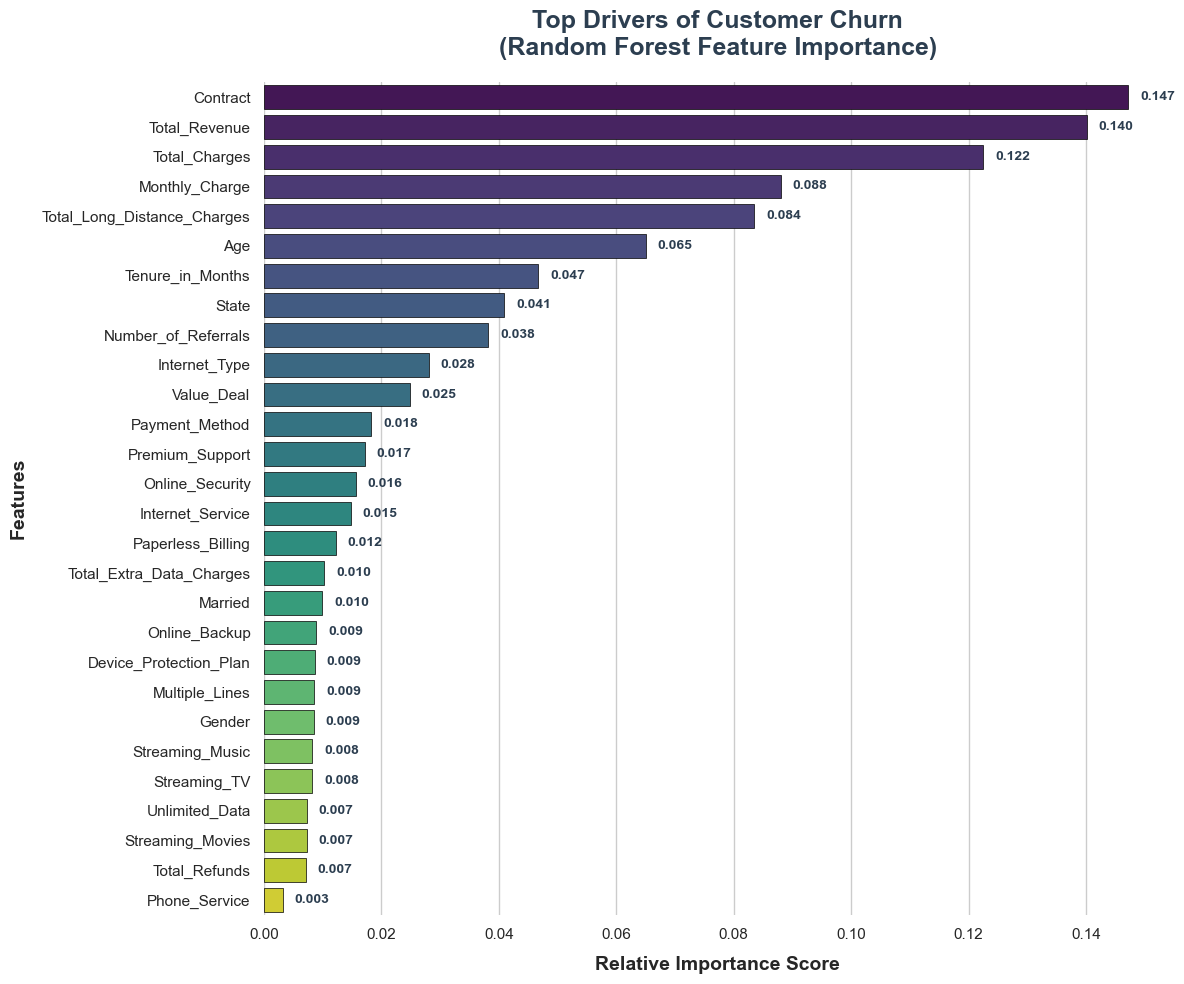

Confusion Matrix:
 [[783  64]
 [126 229]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# --- [Data Loading & Preprocessing - Kept same as your logic] ---
file_path = r"A:\data analytics\projrctsss\Churn Analysis\Prediction_Data.xlsx"
sheet_name = 'vw_ChurnData'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Drop unused columns
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1, errors='ignore')

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# Manually encode target variable
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})
data = data.dropna(subset=['Customer_Status'])

# Split data
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- [ ENHANCED VISUALIZATION SECTION ] ---

# Calculate Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns[indices]
feature_values = importances[indices]

# 1. Set the aesthetic style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 10))

# 2. Create the Bar Plot with a gradient palette
# 'viridis' or 'mako' are great for professional reports
ax = sns.barplot(
    x=feature_values, 
    y=feature_names, 
    palette='viridis',
    edgecolor='black',
    linewidth=0.5
)

# 3. Add Data Labels (the actual importance numbers) to the bars
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(
        width + 0.002,           # Position X
        p.get_y() + p.get_height() / 2, # Position Y (centered)
        f'{width:.3f}',          # Value formatted to 3 decimals
        va='center',             # Vertical alignment
        fontsize=10, 
        fontweight='bold',
        color='#2c3e50'
    )

# 4. Refine Title and Labels
plt.title('Top Drivers of Customer Churn\n(Random Forest Feature Importance)', 
          fontsize=18, fontweight='bold', pad=20, color='#2c3e50')
plt.xlabel('Relative Importance Score', fontsize=14, labelpad=10, fontweight='semibold')
plt.ylabel('Features', fontsize=14, labelpad=10, fontweight='semibold')

# 5. Clean up the layout
sns.despine(left=True, bottom=True) # Remove unnecessary chart borders
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

# Show plot
plt.show()

# --- [Evaluation Output] ---
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))